In [1]:
# 导入基本包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from ipywidgets import *
# from mpl_toolkits import mplot3d #用于绘制3D图形

# 显示所有过程结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False# 用来正常显示负号

## （一）基本原理

### 1、概率转换

逻辑回归是一种分类算法，它是通过一个中间转换函数，将线性回归模型的y值映射成0-1的概率值p，然后通过概率值p进行分类。当p大于设定阈值时，分类为1,，p小于设定阈值时，分类为0.

一般线性回归表达式为：
   $$ y_{line}=\theta_0x_0 +\theta_1x_1+...+\theta_nx_n,x_0 \equiv 1 \Rightarrow y_{line}=x_b\theta  $$
    其中，$\theta=(\theta_0,\theta_1,\theta_2...,\theta_n)^T; x_b=(x_0,x_1,x_2,...,x_n)$
    
一般线性回归的y值取值范围为$(-\infty,\infty)$，但对于逻辑回归而言，其概率值取值范围是(0,1),因此需要引入一个中间函数，将y值映射到(0,1)，即sigmod函数：
    $$ y_{line}=x_b\theta \Rightarrow p = \sigma(x_b\theta),其中p的取值范围为：(0,1)$$
    $$ sigmod函数 = \sigma(t) = \frac{1}{1+e^{-t}} $$
其函数图像如下图所示：

Text(0.5, 0.5, '0.5')

Text(0.5, 0, 't')

Text(0, 0.5, 'p')

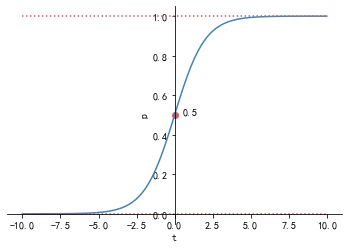

In [8]:
# 逻辑回归 概率转换 sigmoid函数曲线  绘图代码
x = np.linspace(-10,10,100)
y = 1/(1 + np.exp(-x))

plt.plot(x,y,color='steelblue')

ax = plt.gca()
#建立坐标轴
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#移动坐标轴
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
#加上下边界
plt.scatter(0,0.5,color='indianred')
plt.plot(x, x*0 + 1, color='indianred', linestyle=':')
plt.plot(x, x*0 + 0, color='indianred', linestyle=':')

plt.text(0.5,0.5, r'0.5')

plt.xlabel('t')
plt.ylabel('p')

plt.show()

通过观察sigmod函数的图像，可以发现其值域为(0,1)之间，但t>0时，$\theta(t) >0.5$；当t<0时，$\theta$<0.5。根据p值对$y_{line}$进行分类。即：
   $$ y_{line} = \begin{cases}   1& p \geq 0.5 \\
       0& p < 0.5
      \end{cases}$$

### 2、损失函数

损失函数定义：
$$ \begin{cases} 如果真值 y=1，但是预测值\hat{y}=0，即\hat{p}越小，则损失函数cost应该越大 \\
                 如果真值 y=0，但是预测值\hat{y}=1，即\hat{p}越大，则损失函数cost应该越小 \end{cases} $$
其函数表达式，如下：
$$ cost= \begin{cases} -log(\hat{p}) & if y =1 \\
                       -log(1-\hat{p}) & if y = 0 \end{cases} $$

<Figure size 432x504 with 0 Axes>

Text(0, 3.5, '$ -log(\\ \\widehat p\\ ), \\ \\ \\ if \\ y = 1 $')

Text(0.8, 1.5, '$ -log(\\ 1 - \\widehat p\\ ), \\ \\ \\ if \\ y = 0 $')

([<matplotlib.axis.YTick at 0x215b1ab2cd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([<matplotlib.axis.XTick at 0x215b18da1f0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

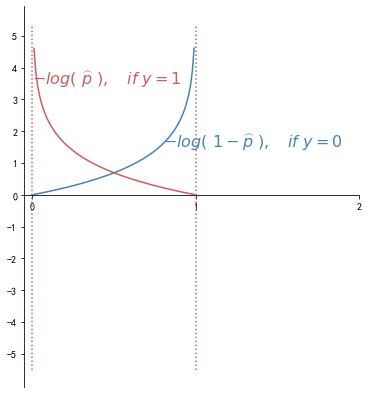

In [9]:
# 绘制损失函数图像
plt.figure(figsize=(6,7))

# 数据
p1 = np.linspace(0.01, 1, 100, endpoint=False)
cost1 = -np.log(p1)
cost2 = -np.log(1-p1)

# 绘制函数名字
plt.text(0, 3.5, r'$ -log(\ \widehat p\ ), \ \ \ if \ y = 1 $',fontsize=16, color='indianred')
plt.text(0.8, 1.5, r'$ -log(\ 1 - \widehat p\ ), \ \ \ if \ y = 0 $',fontsize=16, color='steelblue')

# 绘制函数曲线
plt.plot(p1,cost1,color='indianred')
plt.plot(p1,cost2,color='steelblue')

# 绘制渐近线
y = np.linspace(-5.5, 5.5, 100, endpoint=False)
plt.plot(y*0+1,y,color='indianred',linestyle=':')
plt.plot(y*0,y,color='indianred',linestyle=':')

# 改变x，y坐标轴标签
yticks = [i for i in range(-5,6)]
plt.yticks(yticks)
xticks = [i for i in range(0,3)]
plt.xticks(xticks)

# 编辑坐标轴
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))

plt.show()

通过损失函数 的图像可知：

当我们真值$y=1$时，如果我们的$\hat{p}$更倾向于$\hat{y}=0$，即：$\hat{p} \rightarrow 0$，表明我们预测越离谱，那么我们的损失函数$cost$就会趋向于$\infty$，这样损失函数就会越大；相反，如果我们的$\hat{p}$更倾向于$\hat{y}=1$，即：$\hat{p} \rightarrow 1$，表明我们预测越靠谱，那么我们的损失函数$cost$就会趋向于$0$，损失函数就越小；

当我们真值$y=0$时，如果我们的$\hat{p}$更倾向于$\hat{y}=1$，即：$\hat{p} \rightarrow 1$，表明我们预测越离谱，那么我们的损失函数$cost$就会趋向于$\infty$，这样损失函数就会越大；相反，如果我们的$\hat{p}$更倾向于$\hat{y}=0$，即：$\hat{p} \rightarrow 0$，表明我们预测越靠谱，那么我们的损失函数$cost$就会趋向于$0$，损失函数就越小。

这样我们就定义了一个预测越离谱，损失就越大；预测越靠谱，损失就越小的损失函数。

进一步，损失函数可以写成：
$$
\cos t=-y \log (\hat{p})-(1-y) \log (1-\hat{p})
$$

进一步考虑所有样本，我们的损失函数可以写成：
$$
\begin{gathered}
J(\theta)=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(\hat{p}^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-\hat{p}^{(i)}\right)\right] \\
\text { 其中: } \hat{p}^{(i)}=\sigma\left(\boldsymbol{X}_{b}^{(i)} \theta\right)=\frac{1}{1+e^{-X_{b}^{(i)} \theta}} \\
\Downarrow(\theta)=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(\sigma\left(\boldsymbol{X}_{b}^{(i)} \theta\right)\right)+\left(1-y^{(i)}\right) \log \left(1-\sigma\left(\boldsymbol{X}_{b}^{(i)} \theta\right)\right)\right]
\end{gathered}
$$

$$
X_{b}=\left(\begin{array}{c|cccc}
x_{0}^{(1)} & x_{1}^{(1)} & x_{2}^{(1)} & \cdots & x_{n}^{(1)} \\
x_{0}^{(2)} & x_{1}^{(2)} & x_{2}^{(2)} & \cdots & x_{n}^{(2)} \\
x_{0}^{(3)} & x_{1}^{(3)} & x_{2}^{(3)} & \cdots & x_{n}^{(3)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
{\left[x_{0}^{(i)}\right.} & x_{1}^{(i)} & x_{2}^{(i)} & \cdots & \left.x_{n}^{(i)}\right] \leftarrow \boldsymbol{X}_{b}^{(i)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_{0}^{(m)} & x_{1}^{(m)} & x_{2}^{(m)} & \cdots & x_{n}^{(m)}
\end{array}\right)_{m \times(n+1)} \quad y=\left(\begin{array}{c}
y^{(1)} \\
y^{(2)} \\
y^{(3)} \\
\vdots \\
y^{(m)}
\end{array}\right)_{m \times 1}
\quad \theta=\left(\begin{array}{c}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_n
\end{array}\right)_{m \times 1}
$$

### 3、损失函数的梯度

事实上，逻辑回归的损失函数没有公式解，只能通过梯度下降法进行求解。以下是求解梯度的过程：

我们知道，$J(\theta)$的梯度，实际上就是对$J(\theta)$求关于每个$\theta$的偏导数，进而由偏导数组成的向量就是$J(\theta)$的梯度，如下：
$$
\nabla J(\theta)=\left(\frac{\partial J(\theta)}{\partial \theta_{0}}, \frac{\partial J(\theta)}{\partial \theta_{1}}, \frac{\partial J(\theta)}{\partial \theta_{2}}, \ldots, \frac{\partial J(\theta)}{\partial \theta_{n}}\right)^{T}
$$

因此，我们只需要求出$J(\theta)$关于某个$\theta_j$的偏导数，其他$\theta$的偏导数也就同理可求。求解过程如下：

已知：
$$
J(\theta)=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(\hat{p}^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-\hat{p}^{(i)}\right)\right]
$$
其中: $\hat{p}^{(i)}=\sigma\left(X_{b}^{(i)} \theta\right)=\frac{1}{1+e^{-X_{b}^{(i)} \theta}}$

1、首先求前半部分：$J(\theta)_1=y^{(i)} \log( \sigma( X_{b}^{(i)}\theta ) )$关于$\theta_j$的偏导数。根据链式求导法则：
令：$u=\log( \sigma( X_{b}^{(i)}\theta ) ), v=\sigma( X_{b}^{(i)}\theta, t=X_{b}^{(i)}\theta$
则$u=log(v), v=\theta(t) = \frac{1}{1+e^{-t}}$
$$
\frac{\partial J(\theta)_{1}}{\partial \theta_{j}}=y^{(i)} \frac{\partial u}{\partial v} \frac{\partial v}{\partial t} \frac{\partial t}{\partial \theta_{j}} 
$$                                                              
$$
\left\{\begin{array}{l}
\frac{\partial v}{\partial t}=\frac{\partial \log (v)}{\partial v}=\frac{1}{v} \\
\frac{\partial \sigma(t)}{\partial t}=\partial\left(\frac{1}{1+e^{-t}}\right) / \partial t=-\left(1+e^{-t}\right)^{-2} e^{-t}(-1)=\left(1+e^{-t}\right)^{-2} e^{-t} \\
\frac{\partial t}{\partial \theta_{j}}=x_{j}^{(i)}
\end{array}\right.
$$  
因此:
$$
\begin{aligned}
\frac{\partial J(\theta)_{1}}{\partial \theta_{j}} &=  y^{(i)} \frac{\partial u}{\partial v} \frac{\partial v}{\partial t} \frac{\partial t}{\partial \theta_{j}} \\ 
       &= y^{(i)} \frac{1}{v} \left(1+e^{-t}\right)^{-2} e^{-t} x_{j}^{(i)} \\
       &= y^{(i)} \frac{1+e^(-t)}{1+e^{(-t)}-1} x_{j}^{(i)} \\
       &= y^{(i)} (1-\frac{1+e^{(-t)}}{1}) x_{j}^{(i)} \\
       &= y^{(i)} (1-\sigma(t)) x_{j}^{(i)} \\
       &= y^{(i)} (1-\sigma\left(X_{b}^{(i)}\theta \right) x_{j}^{(i)}
\end{aligned}
$$

2、然后求后半部分：$J(\theta)_2 = \left(1-y^{(i)}\right) \log \left(1-\sigma\left(X_{b}^{(i)}\theta \right) \right)$关于$\theta_j$的偏导数。根据链式求导法则：
令：$u=\log(1- \sigma( X_{b}^{(i)}\theta ) ), v=\sigma( X_{b}^{(i)}\theta, t=X_{b}^{(i)}\theta$
则$u=log(1-v), v=\theta(t) = \frac{1}{1+e^{-t}}$
$$
\frac{\partial J(\theta)_{1}}{\partial \theta_{j}}=(1-y^{(i)}) \frac{\partial u}{\partial v} \frac{\partial v}{\partial t} \frac{\partial t}{\partial \theta_{j}} 
$$  

$$
\left\{\begin{array}{l}
\frac{\partial v}{\partial t}=\frac{\partial \log (v)}{\partial v}=\frac-{1}{1-v} \\
\frac{\partial \sigma(t)}{\partial t}=\partial\left(\frac{1}{1+e^{-t}}\right) / \partial t=-\left(1+e^{-t}\right)^{-2} e^{-t}(-1)=\left(1+e^{-t}\right)^{-2} e^{-t} \\
\frac{\partial t}{\partial \theta_{j}}=x_{j}^{(i)}
\end{array}\right.
$$ 

因此:
$$
\begin{aligned}
\frac{\partial J(\theta)_{1}}{\partial \theta_{j}} &=  (1-y^{(i)}) \frac{\partial u}{\partial v} \frac{\partial v}{\partial t} \frac{\partial t}{\partial \theta_{j}} \\ 
       &= (1-y^{(i)}) (\frac-{1}{1-v}) \left(1+e^{-t}\right)^{-2} e^{-t} x_{j}^{(i)} \\
       &= (1-y^{(i)}) (-\frac{1}{1-\frac{1+e^{-t}}{1}}) (1+e^{-t})^{-2} e^{-t} x_{j}^{(i)} \\
       &= (1-y^{(i)}) (-\frac{1+e^{(-t)}}{e^{-t}}) (1+e^{-t})^{-2} e^{-t} x_{j}^{(i)} \\
       &= -(1-y^{(i)}) (1+e^{-t})^{-1} x_{j}^{(i)} \\
       &= -(1-y^{(i)}) \sigma\left(X_{b}^{(i)}\theta \right) x_{j}^{(i)}
\end{aligned}
$$                                                    

综上：
$$
\begin{aligned}
\frac{\partial J(\theta)}{\partial \theta_{j}}&=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)}\left(1-\sigma\left(X_{b}^{(i)} \theta\right)\right) x_{j}^{(i)}-\left(1-y^{(i)}\right) \sigma\left(X_{b}^{(i)} \theta\right) x_{j}^{(i)}\right]
    &=y^{(i)} x_{j}^{(i)}-y^{(i)} \sigma\left(X_{b}^{(i)} \theta\right) x_{j}^{(i)}-\sigma\left(X_{b}^{(i)} \theta\right) x_{j}^{(i)}+y^{(i)} \sigma\left(X_{b}^{(i)} \theta\right) x_{j}^{(i)}
    &=-\frac{1}{m} \sum_{i=1}^{m}\left(y^{(i)}-\sigma\left(X_{b}^{(i)} \theta\right)\right) x_{j}^{(i)}
    &=-\frac{1}{m} \sum_{i=1}^{m}\left(y^{(i)}-\hat{p}^{(i)}\right) x_{j}^{(i)}
    &=\frac{1}{m} \sum_{i=1}^{m}\left(\hat{p}^{(i)}-y^{(i)} \right) x_{j}^{(i)}
\end{aligned}
$$

因此：
$$
\nabla J(\theta)=\left(\begin{array}{l}
\frac{\partial J(\theta)}{\partial \theta_{0}} \\
\frac{\partial J(\theta)}{\partial \theta_{1}} \\
\frac{\partial J(\theta)}{\partial \theta_{2}} \\
\cdots \\
\frac{\partial J(\theta)}{\partial \theta_{n}}
\end{array}\right)_{(n+1) \times 1}=\frac{1}{m}\left(\begin{array}{l}
\sum_{i=1}^{m}\left(\hat{p}^{(i)}-y^{(i)}\right) x_{0}^{(i)} \\
\sum_{i=1}^{m}\left(\hat{p}^{(i)}-y^{(i)}\right) x_{1}^{(i)} \\
\sum_{i=1}^{m}\left(\hat{p}^{(i)}-y^{(i)}\right) x_{2}^{(i)} \\
\ldots \\
\sum_{i=1}^{m}\left(\hat{p}^{(i)}-x_{2}^{(i)}\right) x_{n}^{(i)}
\end{array}\right)_{(n+1) \times 1}
=\frac{1}{m}\left(\begin{array}{c}
\sum_{i=1}^{m}\left(\sigma\left(X_{b}^{(i)} \theta\right)-y^{(i)}\right) x_{0}^{(i)} \\
\sum_{i=1}^{m}\left(\sigma\left(X_{b}^{(i)} \theta\right)-y^{(i)}\right) x_{1}^{(i)} \\
\sum_{i=1}^{m}\left(\sigma\left(X_{b}^{(i)} \theta\right)-y^{(i)}\right) x_{2}^{(i)} \\
\cdots \\
\sum_{i=1}^{m}\left(\sigma\left(X_{b}^{(i)} \theta\right)-y^{(i)}\right) x_{n}^{(i)}
\end{array}\right)_{(n+1) \times 1}
$$

类比线性回归，可得：
$$
\nabla J(\theta)=\frac{1}{m} X_{b}^{T}\left(\sigma\left(X_{b} \theta\right)-y\right)
$$

## 二、封装

### 1、封装代码

In [27]:
import numpy as np

class MY_LogisticRegression:
    
    def __init__(self):
        '''初始化'''
        self.intercept_ = None
        self.coef_ = None
        self._theta =None
    
    def _Sigmoid(self, t):
        return 1. / (1. + np.exp(-t))
    
    def fit(self, X_train, y_train, eta=0.01, n_iters=1e4, epsilon=1e-8, method='f'):
        '使用梯度下降法进行训练'
        assert X_train.shape[0] == y_train.shape[0], 'X_train 和 y_train 的行数要一致'
        
        def Func_J(theta, X_b, y):
            p_hat = self._Sigmoid(X_b.dot(theta))
            try:
                return - np.sum(y * np.log(p_hat) + (1 - y) * np.log(1 - p_hat)) / len(X_b)
            except:
                return float('inf')
                
        def grad(theta, X_b, y):
            # for循环
            if method == 'f':
                grad_j = np.empty(len(theta))
                grad_j[0] = np.sum(self._Sigmoid(X_b.dot(theta)) - y)
                for i in range(1, len(theta)):
                    grad_j[i] = (self._Sigmoid(X_b.dot(theta)) - y).dot(X_b[:,i])
                return grad_j / len(X_b)
            # 向量法
            if method == 'm':
                    return (X_b).T.dot(self._Sigmoid(X_b.dot(theta)) - y) / len(X_b)
                
        # 定义梯度下降迭代函数
        def gradient_descent(X_b, y, initial_theta, eta, n_iters, epsilon):

            theta = initial_theta
            i_iter = 0

            while i_iter < n_iters:
                theta_old = theta
                theta = theta - eta * grad(theta_old, X_b, y)

                if abs(Func_J(theta, X_b, y) - Func_J(theta_old, X_b, y)) < epsilon:
                    break

                i_iter += 1

            return theta
        
        x_0 = np.ones((len(X_train), 1))
        
        if len(X_train.shape) == 1:
            X_train = X_train.reshape(-1,1)
            
        X_b = np.hstack([x_0, X_train])
        initial_theta = np.zeros(X_b.shape[1])

        self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters, epsilon)
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self

    
    def predict_proba(self, X_predict):
        '''预测结果概率'''
        assert self.intercept_ is not None and self.coef_ is not None, '请先进行训练'
        assert X_predict.shape[1] == len(self.coef_), '特证个数必须与参数（非截距）个数相等'
        
        X_0 = np.ones(shape=(len(X_predict), 1))
        X_b = np.hstack([X_0, X_predict])
        
        return self._Sigmoid(X_b.dot(self._theta)) # p_hat = Sigmoid(X_b.dot(𝜃))
    
    def predict(self, X_predict):
        '''预测'''
        assert self.intercept_ is not None and self.coef_ is not None, '请先进行训练'
        assert X_predict.shape[1] == len(self.coef_), '特证个数必须与参数（非截距）个数相等'
        
        proba = self.predict_proba(X_predict)
        
        return np.array(proba >= 0.5, dtype = 'int')
    
    def my_accuracy_score(self, y_true, y_predict):
        '''计算准确度'''
        assert y_true.shape[0]== y_predict.shape[0], 'y_true与y_predict的行要相等'

        return np.sum(y_true == y_predict)/len(y_true)
    
    def score(self, X_test, y_test):
        '''根据测试数据集X_test和y_test确定当前模型的准确度'''
        y_predict = self.predict(X_test)
        return self.my_accuracy_score(y_test, y_predict)
    
    def __repr__(self):
        return'MY_LogisticRegression()'

### 2、封装测试

In [34]:
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data
y = iris.target

x = x[y<2,:2]
y = y[y<2]

x[:5]
y[:5]


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

array([0, 0, 0, 0, 0])

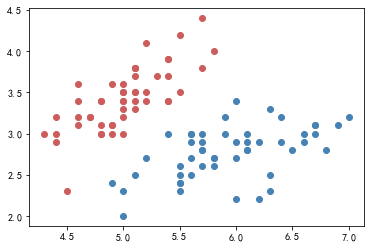

In [13]:
# 绘图
plt.scatter(x[y==1,0], x[y==1,1], color='steelblue')
plt.scatter(x[y==0,0], x[y==0,1], color='indianred')
plt.show()

In [36]:
#  切分数据
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)

In [37]:
my_lr = MY_LogisticRegression()  # 实例化
my_lr.fit(x_train, y_train, eta=0.01, n_iters=1e4, epsilon=1e-8, method='m')  # 训练
y_proba = my_lr.predict_proba(x_test)  # 预测概率
y_predict = my_lr.predict(x_test)  # 预测分类  输出：array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

2


MY_LogisticRegression()

2
2


In [38]:
# 准确度
my_lr.my_accuracy_score(y_test, y_predict)  # 输出：1.0

1.0

## 三、决策边界

### 1、逻辑回归的决策边界

根据逻辑回归分类的基本原理：
$$ y_{line} = \begin{cases}   1& p \geq 0.5 \\
       0& p < 0.5
      \end{cases}
$$
其中：
$$
p = \sigma(x_b \theta) = \frac{1}{1+e^{-x_b \theta}} 
$$
sigmod函数如下图：

Text(0.5, 0.5, '0.5')

Text(0.5, 0, 't')

Text(0, 0.5, 'p')

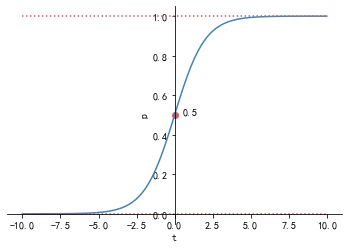

In [16]:
x = np.linspace(-10,10,100)
y = 1/(1 + np.exp(-x))

plt.plot(x,y,color='steelblue')

ax = plt.gca()
#建立坐标轴
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#移动坐标轴
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
#加上下边界
plt.scatter(0,0.5,color='indianred')
plt.plot(x, x*0 + 1, color='indianred', linestyle=':')
plt.plot(x, x*0 + 0, color='indianred', linestyle=':')

plt.text(0.5,0.5, r'0.5')

plt.xlabel('t')
plt.ylabel('p')

plt.show()

由图可知：

$x_b \theta > 0$时，$p>0.5 \rightarrow y=1$；$x_b \theta < 0$时，$p<0.5 \rightarrow y=0$。因此，$x_b \theta = 0$实际上 就是将$y$划分开的一根超维边界线，我们称之为决策边界。
方便理解，我们将维度降低到二维：
$$
\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}=0 \rightarrow x_{2}=-\frac{\theta_{0}+\theta_{1} x_{1}}{\theta_{2}}
$$

如上，我们可以得到一条二维直线，该直线就是决策边界。

以下以前述训练结果对其决策边界进行可视化。

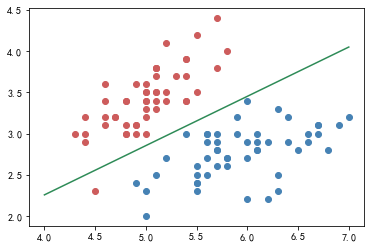

In [39]:
# 绘图
x1 = np.linspace(4, 7)
x2 = - (my_lr.intercept_ + my_lr.coef_[0] * x1)/my_lr.coef_[1]

plt.plot(x1,x2,color='seagreen')
plt.scatter(x[y==1,0], x[y==1,1], color='steelblue')
plt.scatter(x[y==0,0], x[y==0,1], color='indianred')
plt.show()

那么对于不是直线的决策边界应该怎么绘制呢？我们可以将平面中的每个点都进行预测分类，然后将不同的类标记上不同的颜色，这样就可以通过无数个点描绘出决策边界。

In [45]:
# 定义绘制决策边界的函数
def plot_decision_boundary(model, axis):
    
    # 生成网格坐标
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]  # np.c_ 横向合并矩阵；ravel() 矩阵降维；array是列向量

    y_predict = model.predict(X_new)
    
    # 将y还原平面坐标矩阵
    zz = y_predict.reshape(x0.shape)

    # 导入颜色映射
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线

2
2


<ipython-input-45-78f04e33b15d>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线


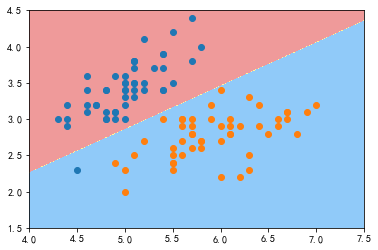

In [46]:
plot_decision_boundary(my_lr, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(x[y==0,0], x[y==0,1])
plt.scatter(x[y==1,0], x[y==1,1])
plt.show()

### 3、KNN的决策边界

In [47]:
from sklearn.neighbors import KNeighborsClassifier 
my_knn = KNeighborsClassifier()
my_knn.fit(x_train, y_train)
my_knn.score(x_test, y_test)  # 输出：1.0

KNeighborsClassifier()

1.0

<ipython-input-45-78f04e33b15d>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线


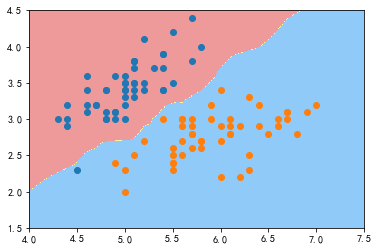

In [48]:
plot_decision_boundary(my_knn, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(x[y==0,0], x[y==0,1])
plt.scatter(x[y==1,0], x[y==1,1])
plt.show()

In [49]:
# 训练多分类 n_neighbors=default
from sklearn.neighbors import KNeighborsClassifier 
my_knn_all = KNeighborsClassifier()
my_knn_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier()

<ipython-input-45-78f04e33b15d>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线


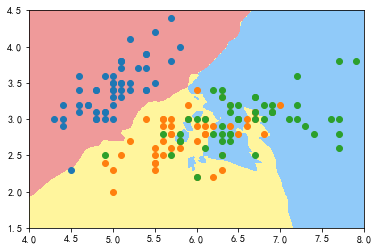

In [50]:
# 多分类的决策边界
plot_decision_boundary(my_knn_all, axis=[4.0, 8.0, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

从上图中我们可以发现，决策边界比较弯曲复杂，这可能就是过拟合在决策边界上的表现。因为我们使用近邻k参数为默认5，这样使得模型复杂度较高（k越小，模型越复杂）。

In [51]:
# 训练多分类 n_neighbors=50
from sklearn.neighbors import KNeighborsClassifier 
my_knn_all = KNeighborsClassifier(n_neighbors=50)
my_knn_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(n_neighbors=50)

<ipython-input-45-78f04e33b15d>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线


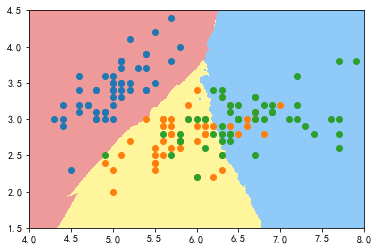

In [52]:
# 多分类的决策边界
plot_decision_boundary(my_knn_all, axis=[4.0, 8.0, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

上图是将近邻k参数提高到50后的决策边界，决策边界变得“简单很多”。

## 四、添加多项式特征的逻辑回归

前文阐述的逻辑回归，其决策边界一直是一条直线。但是在实际情况中，决策边界可能并不是简单的直线，而可能是较为复杂的曲线，如下图：
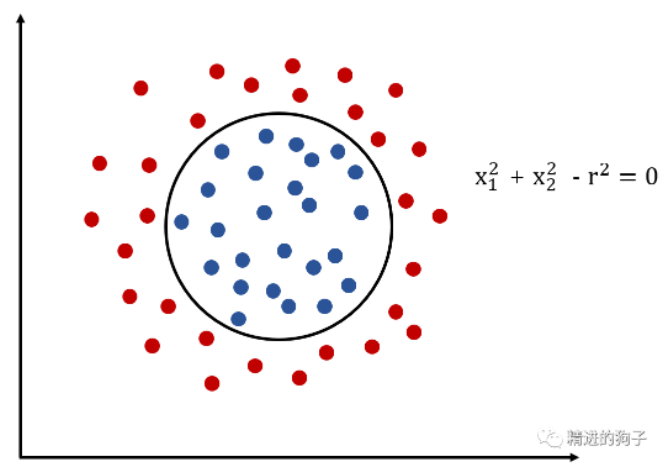
因此我们将多项式特征引进逻辑回归模型中，以期望能够得到更为复杂的决策边界。

In [53]:
# 生成模拟数据
np.random.seed(666)
x = np.random.normal(0, 1, size=(200, 2))
y = np.array(x[:,0] ** 2 + x[:,1] ** 2 < 1.5, dtype='int')

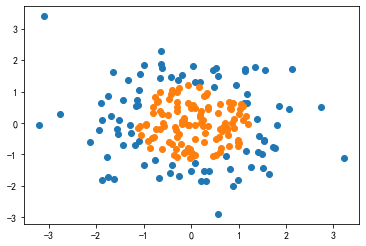

In [54]:
plt.scatter(x[y==0][:,0], x[y==0][:,1])
plt.scatter(x[y==1][:,0], x[y==1][:,1])
plt.show()

In [55]:
my_lr = MY_LogisticRegression()
my_lr.fit(x, y, eta=0.001, n_iters=1e4, epsilon=1e-8, method='m')

my_lr.score(x, y)  # 0.615

2


MY_LogisticRegression()

2
2


0.615

2
2


<ipython-input-45-78f04e33b15d>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线


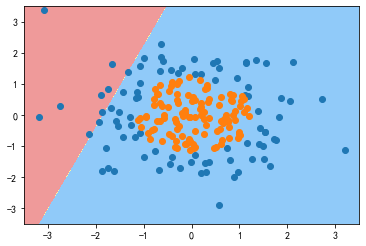

In [57]:
# 绘制决策边界
plot_decision_boundary(my_lr, axis=[-3.5, 3.5, -3.5, 3.5])
plt.scatter(x[y==0,0], x[y==0,1])
plt.scatter(x[y==1,0], x[y==1,1])
plt.show()

In [58]:
from sklearn.pipeline import Pipeline  # 导入管道
from sklearn.preprocessing import PolynomialFeatures  # 导入多项式回归
from sklearn.preprocessing import StandardScaler  # 导入标准化包

def Polynomial_LR(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scalar', StandardScaler()),
        ('lr', MY_LogisticRegression())
    ])

In [59]:
poly_lr_2 = Polynomial_LR(degree=2)
poly_lr_2.fit(x, y)
poly_lr_2.score(x, y)  # 输出：0.95

6


Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scalar', StandardScaler()),
                ('lr', MY_LogisticRegression())])

6
6


0.95

6
6


<ipython-input-45-78f04e33b15d>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线


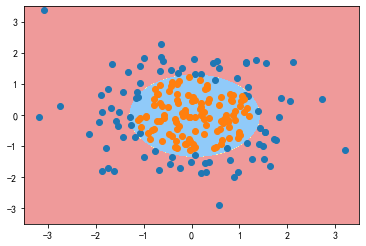

In [60]:
plot_decision_boundary(poly_lr_2, axis=[-3.5, 3.5, -3.5, 3.5])
plt.scatter(x[y==0,0], x[y==0,1])
plt.scatter(x[y==1,0], x[y==1,1])
plt.show()

231


Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scalar', StandardScaler()),
                ('lr', MY_LogisticRegression())])

231
231


0.955

231
231


<ipython-input-45-78f04e33b15d>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线


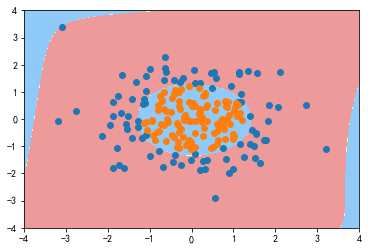

In [61]:
poly_lr_20 = Polynomial_LR(degree=20)
poly_lr_20.fit(x, y)
poly_lr_20.score(x, y)  # 输出：0.955

# 绘制决策边界
plot_decision_boundary(poly_lr_20, axis=[-4.0, 4.0, -4.0, 4.0])
plt.scatter(x[y==0,0], x[y==0,1])
plt.scatter(x[y==1,0], x[y==1,1])
plt.show()

如上图所示，当我们将多项式最多次幂增加到20时，决策边界变得较为复杂，因此可能存在过拟合的风险，可以采用正则化来降低过拟合风险。

## 五、scikit - learn 中的逻辑回归及正则化

前述我们通过引入多项式特征，来较好地拟合非线性数据。多项式特征的引入，使得模型变得较为复杂，决策边界也变得较为复杂弯曲。因此多项式特征的引入可能导致过拟合的风险。降低过拟合风险的方法之一就是为模型添加正则化项。一般添加正则项的方式为：
$$  
\begin{cases}   
    J(\theta)+\alpha L_1& (L1正则项) \\
    J(\theta)+\alpha L_2& (L2正则项) 
\end{cases}
$$
此处引入一种新的正则化方法：
$$  
\begin{cases}   
    C \cdot J(\theta)+ L_1& (L1正则项) \\
    C \cdot J(\theta)+ L_2& (L2正则项) 
\end{cases}
$$
scikit - learn 中对于逻辑回归采用的正则化方式也是上述第 2 种。

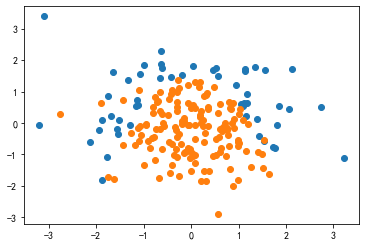

In [62]:
# 生成测试数据
np.random.seed(666)

x = np.random.normal(0, 1, size=(200, 2))
y = np.array(x[:,0]**2 + x[:,1] < 1.5, dtype = 'int')

# 添加随机噪声
for _ in range(20):
    y[np.random.randint(200)] = 1
    
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

In [63]:
# 切分样本
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

### 1、不加入多项式

In [64]:
# 不添加多项式
from sklearn.linear_model import LogisticRegression
sk_lr = LogisticRegression()
sk_lr.fit(x_train, y_train)
sk_lr.score(x_train, y_train)  # 输出：0.86
sk_lr.score(x_test, y_test)  # 输出：0.7933333333333333

LogisticRegression()

0.7933333333333333

0.86

<ipython-input-45-78f04e33b15d>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线


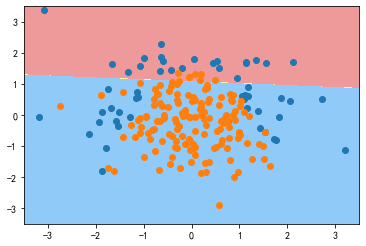

In [65]:
# 绘制决策边界
plot_decision_boundary(sk_lr, axis=[-3.5, 3.5, -3.5, 3.5])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

### 2、加入最高2次幂多项式

In [66]:
# 添加多项式（2次幂）
from sklearn.pipeline import Pipeline  # 导入管道
from sklearn.preprocessing import PolynomialFeatures  # 导入多项式回归
from sklearn.preprocessing import StandardScaler  # 导入标准化包

def Polynomial_LR(degree, solver='liblinear'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scalar', StandardScaler()),
        ('lr', LogisticRegression(solver=solver))
    ])

In [67]:
poly_lr_2 = Polynomial_LR(degree=2)
poly_lr_2.fit(x_train, y_train)
poly_lr_2.score(x_train, y_train)  # 输出：0.9133333333333333
poly_lr_2.score(x_test, y_test)  # 输出：0.94

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scalar', StandardScaler()),
                ('lr', LogisticRegression(solver='liblinear'))])

0.9133333333333333

0.94

<ipython-input-45-78f04e33b15d>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线


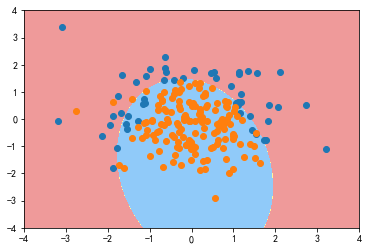

In [68]:
# 绘制决策边界
plot_decision_boundary(poly_lr_2, axis=[-4, 4, -4, 4])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

### 3、添加最高 20 次幂的多项式

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scalar', StandardScaler()),
                ('lr', LogisticRegression(solver='liblinear'))])

0.94

0.92

<ipython-input-45-78f04e33b15d>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线


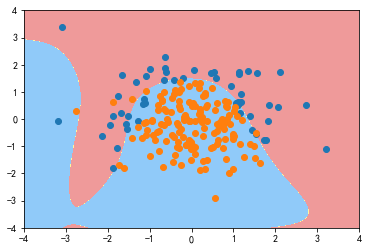

In [69]:
# 训练与评分
poly_lr_20 = Polynomial_LR(degree=20)
poly_lr_20.fit(x_train, y_train)
poly_lr_20.score(x_train, y_train)  # 输出：0.94
poly_lr_20.score(x_test, y_test)  # 输出：0.92


# 绘制决策边界
plot_decision_boundary(poly_lr_20, axis=[-4, 4, -4, 4])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

### 4、添加 L2 正则化项

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scalar', StandardScaler()),
                ('lr', LogisticRegression(C=0.1, solver='liblinear'))])

0.8533333333333334

0.92

<ipython-input-45-78f04e33b15d>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线


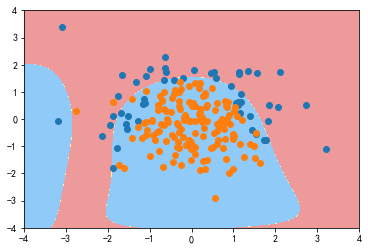

In [70]:
# 默认 L2
def Polynomial_LR(degree, C, solver='liblinear'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scalar', StandardScaler()),
        ('lr', LogisticRegression(C=C, solver=solver))
    ])
# 训练与评分
C_lr_20 = Polynomial_LR(degree=20, C=0.1)
C_lr_20.fit(x_train, y_train)
C_lr_20.score(x_train, y_train)  # 输出：0.8533333333333334
C_lr_20.score(x_test, y_test)  # 输出：0.92


# 绘制决策边界
plot_decision_boundary(C_lr_20, axis=[-4, 4, -4, 4])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

### 5、使用 L1 正则化项

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scalar', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

0.8266666666666667

0.9

<ipython-input-45-78f04e33b15d>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线


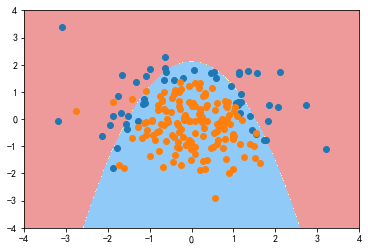

In [71]:
# sklearn 种逻辑回归默认使用的是L2正则化项
def Polynomial_LR(degree, C, penalty='l2', solver='liblinear'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scalar', StandardScaler()),
        ('lr', LogisticRegression(C=C, penalty=penalty, solver=solver))
    ])
# 训练与评分
C_lr_20_L1 = Polynomial_LR(degree=20, C=0.1, penalty='l1')
C_lr_20_L1.fit(x_train, y_train)
C_lr_20_L1.score(x_train, y_train)  # 输出：0.8266666666666667
C_lr_20_L1.score(x_test, y_test)  # 输出：0.9


# 绘制决策边界
plot_decision_boundary(C_lr_20_L1, axis=[-4, 4, -4, 4])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

## 六、逻辑回归解决多分类问题（OvR、OvO）

### 1、基本原理
根据逻辑回归的基本原理我们可以看出，逻辑回归只能解决二分类问题。但是我们通过一定的方法改造，还是能够实现利用逻辑回归处理多分类问题。主要的改造方法有以下两种

(1)、OvR (One vs Rest)
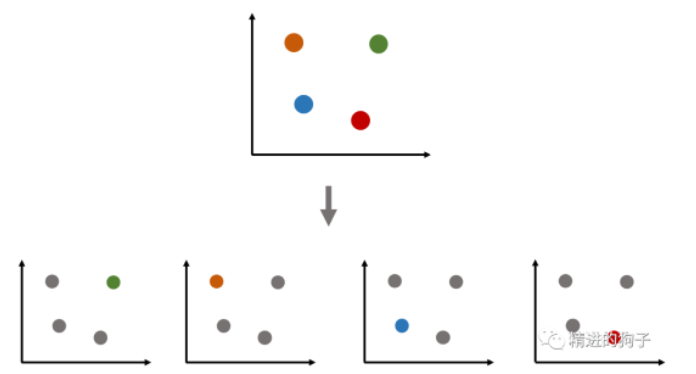
假如现在有 n（图示 n=4）个类别，我们每次将其中1个类别选出，剩余的n-1个类别统一看作一个类别，然后进行二分类任务，从而训练出n个二分类模型。对于新的样本点，我们只需要将其放入n个二分类模型中进行n次分类，选择得分最高的类别作为该新样本点的类别即可。

(2)、OvO (One vs One)
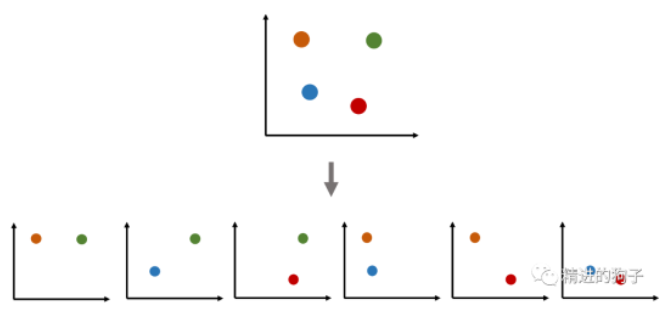
假如现在有 n（图示 n=4）个类别，与 OvR 不同，我们每次选出2个类别，然后进行二分类任务，训练出 $C(n,2)=\frac{n!}{2!(n-2)!}$（图示组合数为：6） 个二分类模型。对于新的样本点，我们只需要将其放入$C(n,2)$个二分类模型中进行$C(n,2)$次分类，选择得分最高的类别作为该新样本点的类别即可。

事实上，OvO 相对于 OvR 来说，分类结果更加准确，这是因为前者并没有将类别进行合并。

### 2、实例演示1（鸢尾花数据 - 两个特征x）

事实上，scikit - learn 中的 LogisticRegression 已经封装好了解决多分类问题的功能，我们只需要传递相关参数进去就可以了。

In [72]:
# 导入鸢尾花数据集（其中两个特征）
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data[:,:2]
y = iris.target

x[:5]
pd.Series(y).unique()
# 切分数据
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

array([0, 1, 2])

LogisticRegression(multi_class='ovr', solver='liblinear')

0.7232142857142857

0.6578947368421053

<ipython-input-45-78f04e33b15d>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线


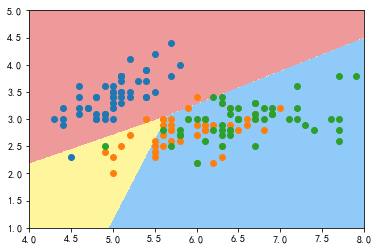

In [73]:
# 1、OvR
# 训练与评分
from sklearn.linear_model import LogisticRegression
ovr_lr = LogisticRegression(multi_class='ovr', solver='liblinear')
ovr_lr.fit(x_train, y_train)
ovr_lr.score(x_train, y_train)  # 输出：0.7232142857142857
ovr_lr.score(x_test, y_test)  # 输出：0.6578947368421053
# 绘制决策边界
plot_decision_boundary(ovr_lr, [4, 8, 1, 5])
plt.scatter(x[y==0,0], x[y==0,1])
plt.scatter(x[y==1,0], x[y==1,1])
plt.scatter(x[y==2,0], x[y==2,1])

LogisticRegression(multi_class='multinomial', solver='newton-cg')

0.8214285714285714

0.7894736842105263

<ipython-input-45-78f04e33b15d>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  # plt.contourf 绘制三维等高线


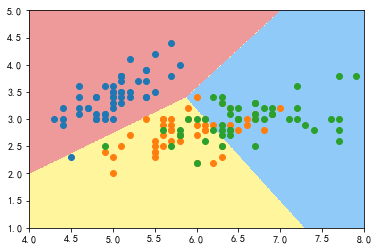

In [74]:
# 2、OvO
# 训练与评分
from sklearn.linear_model import LogisticRegression
ovo_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
ovo_lr.fit(x_train, y_train)
ovo_lr.score(x_train, y_train)  # 输出：0.8214285714285714
ovo_lr.score(x_test, y_test)  # 输出：0.7894736842105263
# 绘制决策边界
plot_decision_boundary(ovo_lr, [4, 8, 1, 5])
plt.scatter(x[y==0,0], x[y==0,1])
plt.scatter(x[y==1,0], x[y==1,1])
plt.scatter(x[y==2,0], x[y==2,1])

### 3、实例演示2（鸢尾花数据 - 全部特征x）

In [75]:

# 导入鸢尾花数据集（所有特征）
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data
y = iris.target

x[:5]
pd.Series(y).unique()
# 切分数据
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

array([0, 1, 2])

In [77]:
# 1、OvR
# OvR训练与评分
from sklearn.linear_model import LogisticRegression
ovr_lr = LogisticRegression(multi_class='ovr', solver='liblinear')
ovr_lr.fit(x_train, y_train)
ovr_lr.score(x_train, y_train)  # 输出：0.9464285714285714
ovr_lr.score(x_test, y_test)  # 输出：0.9473684210526315

LogisticRegression(multi_class='ovr', solver='liblinear')

0.9464285714285714

0.9473684210526315

In [78]:
# 2、OvO
# 训练与评分
from sklearn.linear_model import LogisticRegression
ovo_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
ovo_lr.fit(x_train, y_train)
ovo_lr.score(x_train, y_train)  # 输出：0.9732142857142857
ovo_lr.score(x_test, y_test)  # 输出：1.0

LogisticRegression(multi_class='multinomial', solver='newton-cg')

0.9732142857142857

1.0

### 4、scikit - learn 中的 OvR 与 OvO 类
scikit - learn 中单独封装了用来实现 OvR 和 OvO 的两个类，能够配合其他的二分类器（不仅仅是逻辑回归）实现多分类任务。

1、OneVsRestClassifier

In [81]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
ovr_class = OneVsRestClassifier(lr)

ovr_class.fit(x_train, y_train)
ovr_class.score(x_train, y_train)  # 输出：0.9464285714285714
ovr_class.score(x_test, y_test)  # 输出：0.9473684210526315

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

0.9464285714285714

0.9473684210526315

2、OneVsOneClassifier

In [82]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cg')
ovo_class = OneVsOneClassifier(lr)

ovo_class.fit(x_train, y_train)
ovo_class.score(x_train, y_train)  # 输出：0.9642857142857143
ovo_class.score(x_test, y_test)  # 输出：1.0

OneVsOneClassifier(estimator=LogisticRegression(solver='newton-cg'))

0.9642857142857143

1.0